<a href="https://colab.research.google.com/github/derewor/Superstore-Project/blob/main/Superstore_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install kagglehub

In [11]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# path = kagglehub.dataset_download("fatihilhan/global-superstore-dataset")
#
# print("Path to dataset files:", path)
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)

In [12]:
df = pd.read_csv('/content/superstore.csv', delimiter=';')
df.head(2)

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,Order.Priority,Product.ID,Product.Name,Profit,Quantity,Region,Row.ID,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,High,OFF-PA-10002005,Xerox 225,9.3312,3,West,36624,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,Medium,OFF-PA-10002893,"Wirebound Service Call Books, 5 1/2"" x 4""",9.2928,2,West,37033,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4


# **Business Questions**
1. What is the overall performace of the company over the years? interms of quantity of product sales and proft?
2. Which market region, state and city generates the highest profit on average in the last four years and how is the trend of sales and profit?
3. Which product category, sub_category are the most sold in quantity and high in profit? What about the specific products which are sold in large quanity and generate the highest profit in the last year?
4. How does the sale of products vary across different months of the year? is the trend similar in all of the data?
5. How the profit generated vary across the different months or quarters of the year?
6. How does the sales and profit vary across the different segments of customers?


In [13]:
df.shape

(51290, 27)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [15]:
df.isna().sum()

,0
Category,0
City,0
Country,0
Customer.ID,0
Customer.Name,0
Discount,0
Market,0
记录数,0
Order.Date,0
Order.ID,0


# **EXPOLORATORY DATA ANALYSIS**

In [16]:
df.describe()

,Discount,记录数,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290.0,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,1.406178,1.0,28.327877,3.476545,25645.50000,246.498440,35.170816,2012.777208,31.287112
std,22.824255,0.0,182.415040,2.278766,14806.29199,487.567175,94.878517,1.098931,14.429795
min,0.000000,1.0,-6599.978000,1.000000,1.00000,0.000000,0.010000,2011.000000,1.000000
25%,0.000000,1.0,0.000000,2.000000,12823.25000,31.000000,2.810000,2012.000000,20.000000
50%,0.000000,1.0,9.360000,3.000000,25645.50000,85.000000,8.280000,2013.000000,33.000000
75%,0.200000,1.0,37.680000,5.000000,38467.75000,251.000000,26.369750,2014.000000,44.000000
max,602.000000,1.0,8399.976000,14.000000,51290.00000,22638.000000,999.000000,2014.000000,53.000000


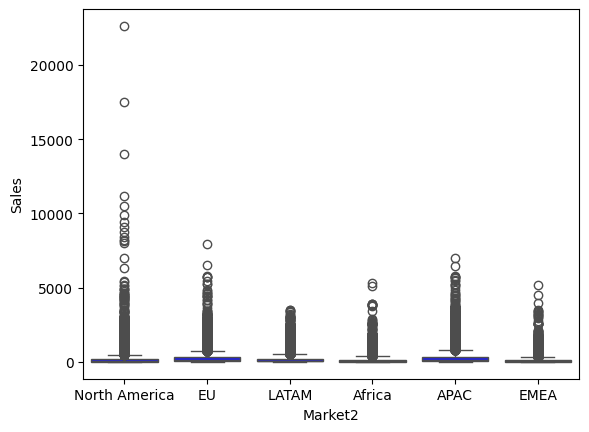

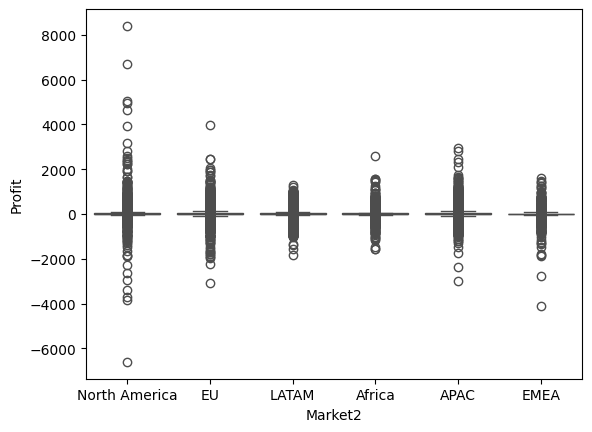

In [17]:
# Check the distribbution of the quantity, Sales and profit using the box plot
sns.boxplot(data=df, x= 'Market2', y='Sales', color='blue')
plt.show()
sns.boxplot(data=df, x= 'Market2', y='Profit', color='red')
plt.show()

# 1. What is the overall performace of the company over the years? interms of quantity of product sales and proft?

In [18]:
# To calcuate the product sale changes over years, the year has to extracted from the Order.date column.
# However, the data type of the 'Order.date' column is an object. it needs to be converted to datetime.
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Year'] = df['Order.Date'].dt.year.astype(int)
df.head(2)

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,Order.Priority,Product.ID,Product.Name,Profit,Quantity,Region,Row.ID,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07,CA-2011-130813,High,OFF-PA-10002005,Xerox 225,9.3312,3,West,36624,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21,CA-2011-148614,Medium,OFF-PA-10002893,"Wirebound Service Call Books, 5 1/2"" x 4""",9.2928,2,West,37033,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4


In [19]:
# calculate the total quantity of products sold and the profits made per year in the last four years.
qty_year = df.groupby('Year')[['Quantity','Profit']].sum().reset_index()
qty_year

,Year,Quantity,Profit
0,2011,31443,239707.05454
1,2012,38111,300155.54610
2,2013,48136,413044.11518
3,2014,60622,500030.11046


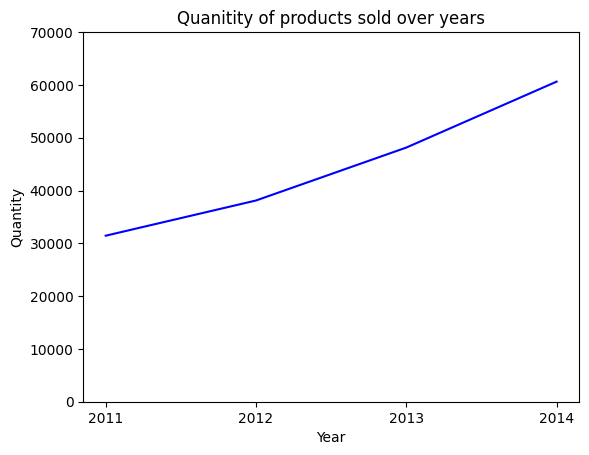

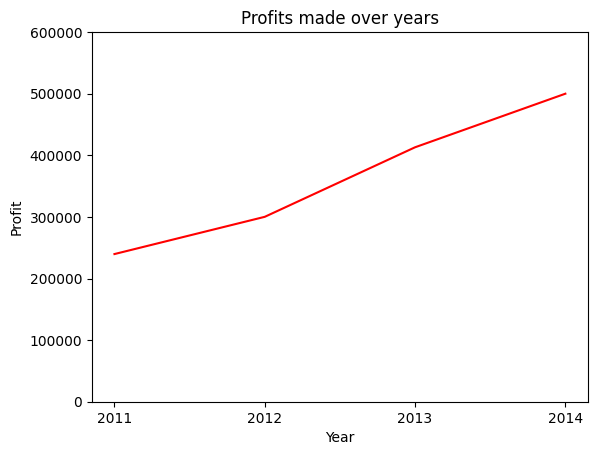

In [20]:
# plot a line chart that show the trend of quantity and profit over years.

sns.lineplot(data=qty_year, x='Year', y='Quantity', color='blue')
plt.xticks([2011, 2012, 2013, 2014])
plt.title('Quanitity of products sold over years')
plt.ylim(0,70000)
plt.show()
sns.lineplot(data=qty_year, x='Year', y='Profit', color='red')
plt.xticks([2011, 2012, 2013, 2014])
plt.title('Profits made over years')
plt.ylim(0, 600000)
plt.show()

## The company's total sale and profit linearly increase over the last four years and has doubled in four years. The next question is how this performance is evaluated in each region, state and city?

# 2. Which market region, state and city generates the highest profit on average in the last four years and how is the trend of sales and profit?

In [21]:
year_Market2 = df.groupby(['Market2','Year'])[['Quantity','Profit']].sum().reset_index()
year_Market2['profit_ratio'] = (year_Market2['Profit'] / year_Market2['Quantity']).round(2)
year_Market2

,Market2,Year,Quantity,Profit,profit_ratio
0,APAC,2011,7253,78017.59440,10.76
1,APAC,2012,8728,87516.74640,10.03
2,APAC,2013,10983,130203.01890,11.85
3,APAC,2014,14262,134253.70430,9.41
4,Africa,2011,1926,10944.11400,5.68
5,Africa,2012,1961,11908.93500,6.07
6,Africa,2013,2932,26687.11200,9.10
7,Africa,2014,3745,39052.74900,10.43
8,EMEA,2011,1904,5280.03000,2.77
9,EMEA,2012,2395,2302.69500,0.96


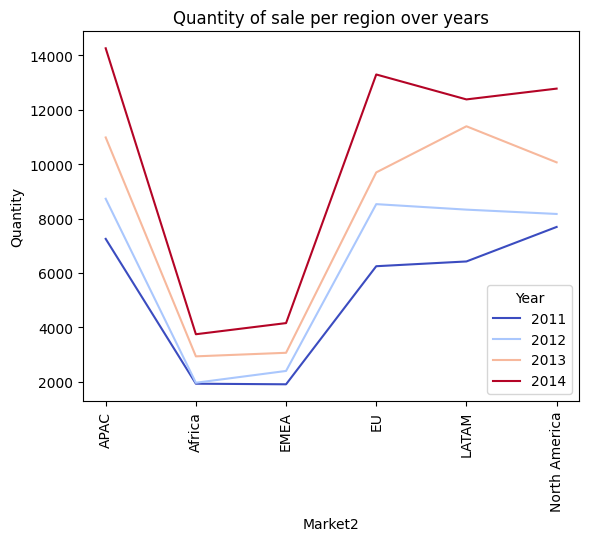

In [22]:
# plot the total quanity of orders across years per region.
sns.lineplot(data=year_Market2, x='Market2', y='Quantity', hue='Year', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Quantity of sale per region over years')
plt.show()

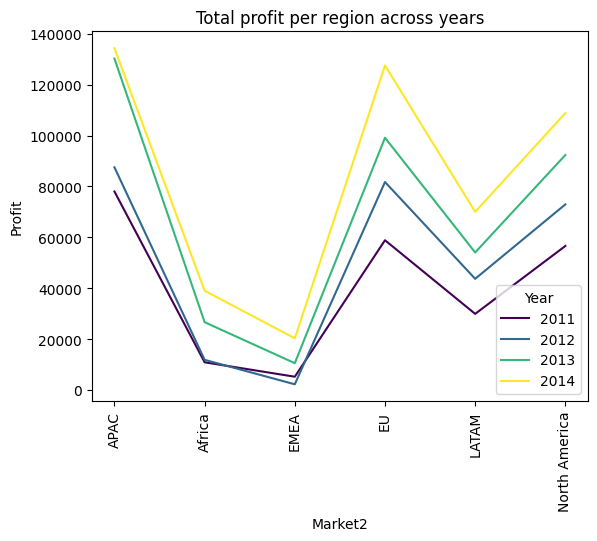

In [23]:
# plot the total profit across years per region.
sns.lineplot(data=year_Market2, x='Market2', y='Profit', hue='Year', palette='viridis')
plt.xticks(rotation=90)
plt.title('Total profit per region across years')
plt.show()

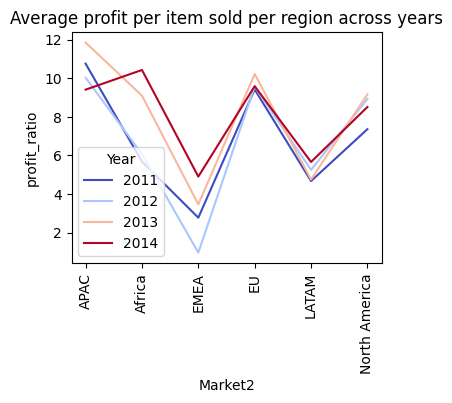

In [24]:
# plot the profit ratio across years per region.
plt.figure(figsize=(4,3))
sns.lineplot(data=year_Market2, x='Market2', y='profit_ratio', hue='Year', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Average profit per item sold per region across years')
plt.show()

Except for Canada and Caribean countries, the total quanty of sales increased linearly over the four years. Central America contributes the biggest share of sales and profits over four years. In Oceania region, surprisingly, despite an increase in the quantity of sales, the profit reduced consderably. The average profit per item was reduced in 2014 compared to 2013.

# How did the different regions of USA performed in those  four years?

In [25]:
usa_df = df[df['Market']=='US'] # or df.query("Market=='US'")
usa_df.shape

(9994, 27)

In [26]:
usa_df.head(2)

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,Order.Priority,Product.ID,Product.Name,Profit,Quantity,Region,Row.ID,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07,CA-2011-130813,High,OFF-PA-10002005,Xerox 225,9.3312,3,West,36624,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21,CA-2011-148614,Medium,OFF-PA-10002893,"Wirebound Service Call Books, 5 1/2"" x 4""",9.2928,2,West,37033,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4


In [27]:
# sale and profit per region and year in USA
year_region = usa_df.groupby(['Region','Year'])[['Quantity','Profit']].sum().reset_index()
year_region

,Region,Year,Quantity,Profit
0,Central,2011,1726,3554.5354
1,Central,2012,1815,13679.8370
2,Central,2013,2359,21700.3599
3,Central,2014,2880,11574.8162
4,East,2011,1986,17059.6095
5,East,2012,2382,25047.0530
6,East,2013,2835,22140.8453
7,East,2014,3415,34597.9422
8,South,2011,1336,13214.7830
9,South,2012,1344,8318.5940


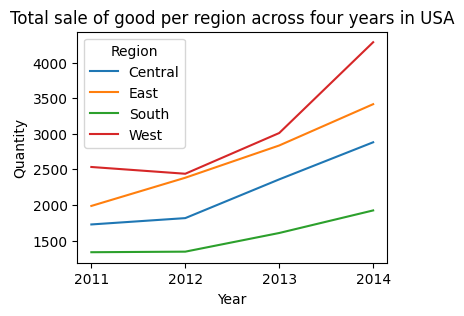

In [28]:
# plot a line graph to visualize the performace of each region over the last four years.
plt.figure(figsize=(4,3))
sns.lineplot(data=year_region, x='Year', y='Quantity',hue='Region')
plt.xticks([2011,2012,2013,2014])
plt.title('Total sale of good per region across four years in USA')
plt.show()

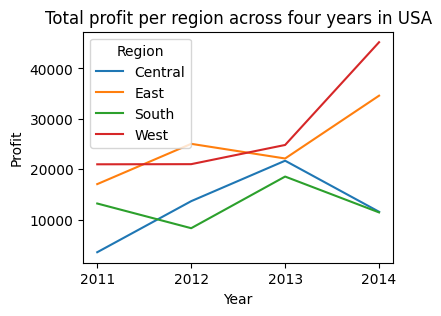

In [29]:
# plot a line graph to visualize the performace of each region over the last four years.
plt.figure(figsize=(4,3))
sns.lineplot(data=year_region, x='Year', y='Profit',hue='Region')
plt.xticks([2011,2012,2013,2014])
plt.title('Total profit per region across four years in USA')
plt.show()

**Surprisngly, the profit of the south region and central region fall down in 2014 despite an increase in total quantity of product sales? Why? Is there a big discount in these regions on the goods?**


In [30]:
# Calculate the average discount of the goods in these four regions.
disc_region = usa_df.groupby(['Region','Year'])['Discount'].agg(['mean','sum']).reset_index().round(2)
disc_region.columns = ['Region','Year','mean_disc','tot_disc']
disc_region

,Region,Year,mean_disc,tot_disc
0,Central,2011,0.26,123.46
1,Central,2012,0.24,114.54
2,Central,2013,0.22,133.92
3,Central,2014,0.24,186.42
4,East,2011,0.16,81.70
5,East,2012,0.13,86.80
6,East,2013,0.14,109.20
7,East,2014,0.15,136.30
8,South,2011,0.12,42.05
9,South,2012,0.16,53.35


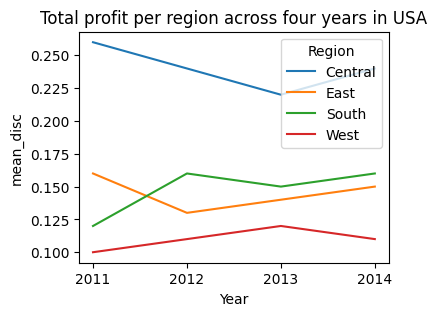

In [31]:
# plot a line graph to visualize the average discount of each region over the last four years.
plt.figure(figsize=(4,3))
sns.lineplot(data=disc_region, x='Year', y='mean_disc',hue='Region')
plt.xticks([2011,2012,2013,2014])
plt.title('Total profit per region across four years in USA')
plt.show()

**There is about a 1% and 2% increase in the discount in 2014 compared to 2013 in the south and central regions of USA, respectively.**

## 3. Which product category, sub_category are the most sold in quantity and high in profit? What about the specific products which are sold in large quanity and generate the highest profit in the last year?

In [32]:
# How many unique product catagories, subcategories and products are available in the table?
uniq_categories = df.Category.nunique()
uniq_subcategory = df['Sub.Category'].nunique()
uniq_products = df['Product.Name'].nunique()
print(f"Categories are:{uniq_categories}, uniq_subcategory are:{uniq_subcategory}, uniq_products are:{uniq_products}")

Categories are:3, uniq_subcategory are:17, uniq_products are:3788


In [33]:
# Which product category is the most sold and the most profitable?
stat_category = df.groupby('Category')[['Quantity','Profit']].sum().reset_index()
stat_category['proportion'] = stat_category['Profit'] / stat_category['Profit'].sum() * 100
stat_category

,Category,Quantity,Profit,proportion
0,Furniture,34954,276748.18880,19.047503
1,Office Supplies,108182,510383.93230,35.127744
2,Technology,35176,665804.70518,45.824753


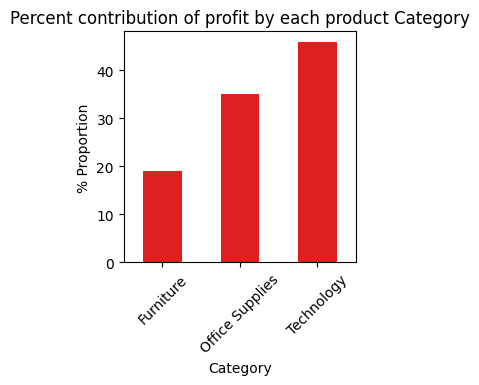

In [34]:
# Show using barchart the profit contribution of each category as percent.
plt.figure(figsize=(3,3))
sns.barplot(data=stat_category, x='Category', y='proportion', color='red', width=0.5)
plt.title('Percent contribution of profit by each product Category')
plt.xticks(rotation=45)
plt.ylabel('% Proportion')
plt.show()

In [35]:
# Which product subcategory is the most sold and the most profitable?
stat_subcategory = df.groupby('Sub.Category')[['Quantity','Profit']].sum().reset_index()
stat_subcategory['proportion'] = stat_subcategory['Profit'] / stat_subcategory['Profit'].sum() * 100
stat_subcategory

,Sub.Category,Quantity,Profit,proportion
0,Accessories,10946,132678.25120,9.131729
1,Appliances,6078,144895.37140,9.972586
2,Art,16301,63455.40390,4.367389
3,Binders,21429,58749.56000,4.043504
4,Bookcases,8310,161925.41850,11.144698
5,Chairs,12336,137269.39750,9.447720
6,Copiers,7454,258046.07018,17.760309
7,Envelopes,8380,27505.21430,1.893077
8,Fasteners,8390,14558.38810,1.001997
9,Furnishings,11225,41708.68950,2.870647


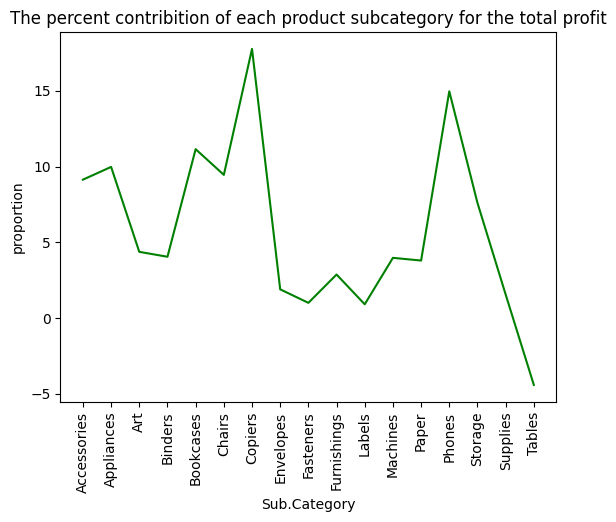

In [36]:
# The profit proportion of each sub category as percentage.
sns.lineplot(data=stat_subcategory, x='Sub.Category', y='proportion', color='green')
plt.xticks(rotation=90)
plt.title('The percent contribition of each product subcategory for the total profit')
plt.show()

In [37]:
categ_subcateg = df[['Category','Sub.Category']].value_counts().reset_index().sort_values(by='Category',ascending=True)
categ_subcateg

,Category,Sub.Category,count
16,Furniture,Tables,861
12,Furniture,Bookcases,2411
4,Furniture,Chairs,3434
6,Furniture,Furnishings,3170
14,Office Supplies,Appliances,1755
11,Office Supplies,Fasteners,2420
10,Office Supplies,Supplies,2425
9,Office Supplies,Envelopes,2435
0,Office Supplies,Binders,6152
3,Office Supplies,Paper,3538


In [38]:
stat_cat_subcat = stat_subcategory.merge(categ_subcateg, how='inner', on='Sub.Category').sort_values(by='Category', ascending=True)
stat_cat_subcat


,Sub.Category,Quantity,Profit,proportion,Category,count
16,Tables,3083,-64155.31670,-4.415561,Furniture,861
4,Bookcases,8310,161925.41850,11.144698,Furniture,2411
5,Chairs,12336,137269.39750,9.447720,Furniture,3434
9,Furnishings,11225,41708.68950,2.870647,Furniture,3170
14,Storage,16917,110380.56880,7.597066,Office Supplies,5059
12,Paper,12822,55114.77970,3.793336,Office Supplies,3538
10,Labels,9322,13155.36900,0.905433,Office Supplies,2606
15,Supplies,8543,22569.27710,1.553356,Office Supplies,2425
8,Fasteners,8390,14558.38810,1.001997,Office Supplies,2420
3,Binders,21429,58749.56000,4.043504,Office Supplies,6152


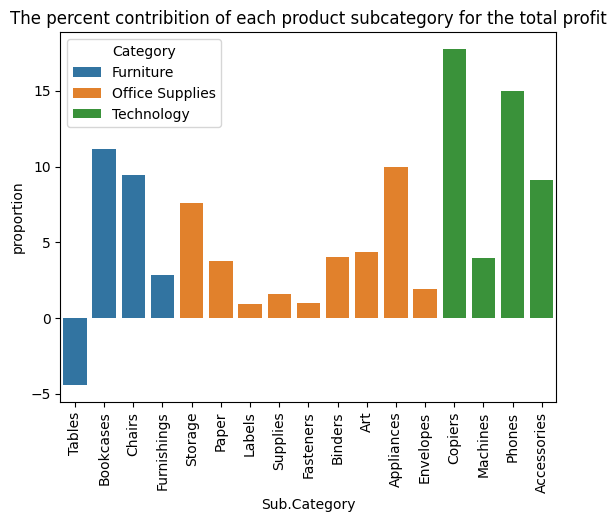

In [39]:
sns.barplot(data=stat_cat_subcat, x='Sub.Category', y='proportion', hue='Category')
plt.xticks(rotation=90)
plt.title('The percent contribition of each product subcategory for the total profit')
plt.show()

**Overall, technology is the most profitable category. Furniture, except for the tables the other subcategories are highly profitable.**

In [40]:
# What are the top 10 and bottom 10 products interms of profit?
stat_product = df.groupby('Product.Name')['Profit'].sum().sort_values(ascending=False).reset_index()
top10 = stat_product.head(10)
bottom10 = stat_product.tail(10)
display(top10)
display(bottom10)

,Product.Name,Profit
0,Canon imageCLASS 2200 Advanced Copier,25199.9280
1,"Cisco Smart Phone, Full Size",17238.5206
2,"Motorola Smart Phone, Full Size",17027.1130
3,"Hoover Stove, Red",11807.9690
4,"Sauder Classic Bookcase, Traditional",10672.0730
5,"Harbour Creations Executive Leather Armchair, ...",10427.3260
6,"Nokia Smart Phone, Full Size",9938.1955
7,"Cisco Smart Phone, with Caller ID",9786.6408
8,"Nokia Smart Phone, with Caller ID",9401.3897
9,"Belkin Router, USB",8955.0180


,Product.Name,Profit
3778,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-2876.1156
3779,"Rogers Lockers, Blue",-2893.4908
3780,"Eldon Lockers, Blue",-2978.2984
3781,"Kraft Peel and Seal, Set of 50",-3407.7469
3782,"Bevis Computer Table, Fully Assembled",-3509.5638
3783,"Bevis Round Table, Adjustable Height",-3649.8940
3784,Cubify CubeX 3D Printer Triple Head Print,-3839.9904
3785,"Motorola Smart Phone, Cordless",-4447.0380
3786,Lexmark MX611dhe Monochrome Laser Printer,-4589.9730
3787,Cubify CubeX 3D Printer Double Head Print,-8879.9704


# **The unprofitable products composed of prineters and tables. **

# 4. How does the sale of products vary across different months of the year? is the trend similar in all of the data?

In [41]:
# extract the order month from each order date of the products.
df['Month'] = df['Order.Date'].dt.month
profit_month = (
    df.groupby(['Month','Year'])[['Profit', 'Quantity']]
    .sum()
    .round(2)
    .reset_index()
    .sort_values(['Year','Month'], ascending=True)
    )
profit_month

,Month,Year,Profit,Quantity
0,1,2011,8049.07,1463
4,2,2011,11249.08,1224
8,3,2011,13769.10,1836
12,4,2011,13919.31,2020
16,5,2011,12135.88,2013
20,6,2011,17780.89,3112
24,7,2011,6488.10,1774
28,8,2011,22524.86,3035
32,9,2011,32762.90,3707
36,10,2011,27990.39,2727


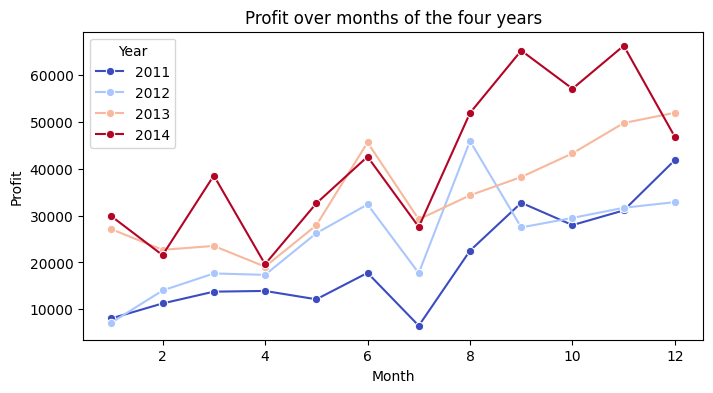

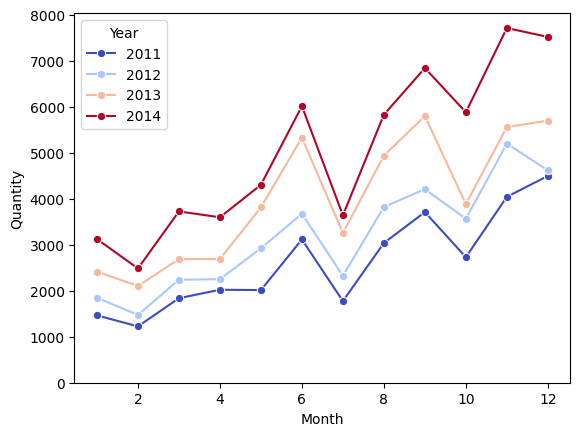

In [42]:
# plot a line grapth to show the profit in different months of the year.
plt.figure(figsize=(8,4))
sns.lineplot(data=profit_month, x='Month', y='Profit', hue='Year', marker='o', palette='coolwarm')
plt.title('Profit over months of the four years')
plt.show()
sns.lineplot(data=profit_month, x='Month', y='Quantity', hue='Year', marker='o', palette='coolwarm')
plt.ylim(0,)
plt.show()

The Profit of the company generally increases towards the end of year and this is a consequence of increase in the total sale quantity.

# 6. How does the sales and profit vary across the different segments of customers?

In [43]:
# calculate the total quantity of sales and profits across the different segments
stat_segment = df.groupby('Segment')[['Quantity','Profit']].sum().reset_index().round(2)
stat_segment

,Segment,Quantity,Profit
0,Consumer,92157,726591.45
1,Corporate,53565,444037.50
2,Home Office,32590,282307.88


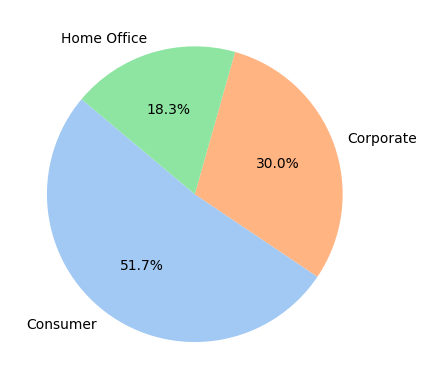

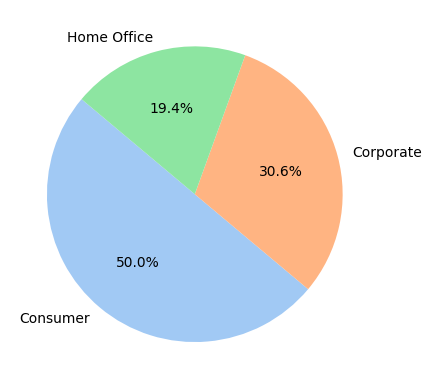

In [44]:

# plot a pie chart to show the proportion of the three segments for the total sale and profit
plt.pie(stat_segment['Quantity'], labels = stat_segment['Segment'], colors=sns.color_palette('pastel'),  autopct='%1.1f%%', startangle=140)
plt.show()
plt.pie(stat_segment['Profit'], labels = stat_segment['Segment'], colors=sns.color_palette('pastel'),  autopct='%1.1f%%', startangle=140)
plt.show()

# How the EU transaction looks like?

In [56]:
eu_df = df[df['Market'] =='EU']
germany_df = eu_df.query("Country=='Germany'")
germany_df.shape

(2065, 28)

In [59]:
# cacluclate the total sale and profits in the fours years to see the German market
stat_germany = germany_df.groupby('Year')[['Quantity','Profit']].sum().reset_index().round(2)
stat_germany


,Year,Quantity,Profit
0,2011,1491,20687.73
1,2012,1735,25451.85
2,2013,2100,28763.65
3,2014,2419,34133.87


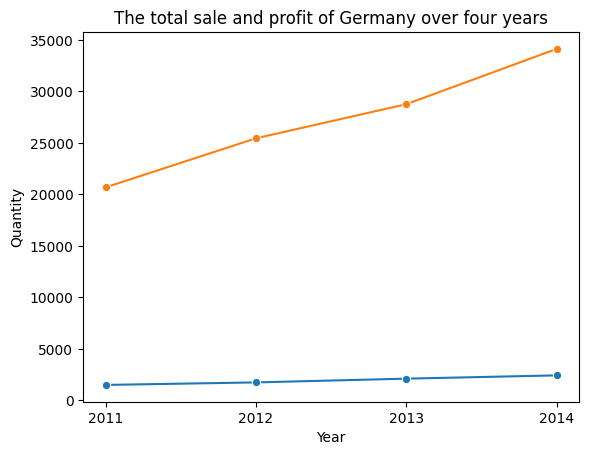

In [70]:
# show the total sale and profit of Germany for the four years using bargraph
sns.lineplot(data=stat_germany, x='Year', y='Quantity', marker='o')
sns.lineplot(data=stat_germany, x='Year', y='Profit', marker='o')
plt.xticks([2011,2012,2013,2014])
plt.title('The total sale and profit of Germany over four years')
plt.show()

In [75]:
# what are the top products sold in Germany in the four years interms of profit?
germ_top10 = germany_df.groupby(['Year','Product.Name'])['Profit'].sum().reset_index().sort_values('Profit', ascending=False).head(10)
germ_top10

,Year,Product.Name,Profit
1033,2013,"Motorola Smart Phone, Full Size",1942.650
264,2011,"Rogers Folders, Wire Frame",1764.000
1340,2014,"Cisco Smart Phone, Full Size",1655.280
196,2011,"Hoover Stove, Red",1591.611
1125,2013,"Smead Box, Wire Frame",1332.000
1129,2013,"Smead Folders, Blue",1282.572
1341,2014,"Cisco Smart Phone, with Caller ID",1151.400
452,2012,"Cuisinart Stove, Red",1130.346
626,2012,"Rogers Lockers, Industrial",1123.770
652,2012,"SanDisk Router, Erganomic",1118.040


In [76]:
# The most unprofitable 10 products in Germany
germ_bottom10 = germany_df.groupby(['Year','Product.Name'])['Profit'].sum().reset_index().sort_values('Profit', ascending=False).tail(10)
germ_bottom10

,Year,Product.Name,Profit
1065,2013,"Rogers Folders, Single Width",-643.284
1022,2013,"Logitech Router, Bluetooth",-667.920
1473,2014,"Ibico Binder Covers, Clear",-819.300
819,2013,"Bevis Round Table, Adjustable Height",-832.665
1576,2014,"Okidata Printer, White",-889.305
1443,2014,"Hamilton Beach Stove, Black",-1121.688
1273,2014,"Barricks Round Table, Adjustable Height",-1128.435
445,2012,"Chromcraft Coffee Table, Fully Assembled",-1144.116
374,2012,"Apple Smart Phone, with Caller ID",-1783.080
394,2012,"Bevis Conference Table, Fully Assembled",-1924.542
